In [1]:
from matplotlib.pyplot import *
import numpy as np
import codecs
from os import listdir as ld

In [2]:
def spectrum_plot(name):
    with codecs.open(name + '.ascii', 'r', encoding='utf-8', errors = 'ignore') as f:
        lines = f.readlines()[8:]
        x = [float(i.split()[0]) for i in lines]
        y = [float(i.split()[1]) for i in lines]
    if '_' in name:
        lbl = name.split('_')[1]
        if lbl == '05':
            lbl = '0.5'
        plot(x, y, label = lbl)
    else:
        plot(x, y)
    return x, y

def spectrum(*names):
    for name in names:
        spectrum_plot(name)
    xlabel(r'$\lambda, нм$')
    ylabel('Spectral amplitude')
    grid()
    legend()

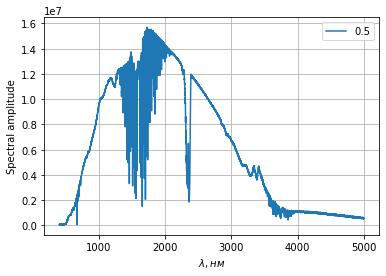

In [3]:
spectrum('air_05_no1')
savefig('Example.pdf')

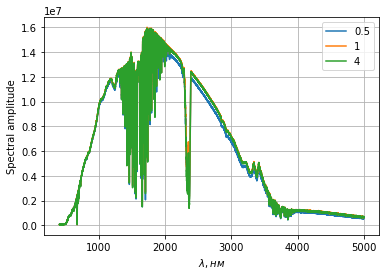

In [4]:
spectrum('air_05_no1', 'air_1_no1', 'air_4_no1')
savefig('Different_R.pdf')

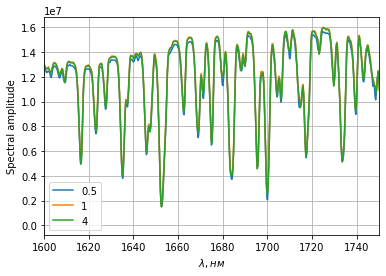

In [5]:
spectrum('air_05_no1', 'air_1_no1', 'air_4_no1')
xlim(left = 1600, right = 1750)
savefig('CO_2.pdf')

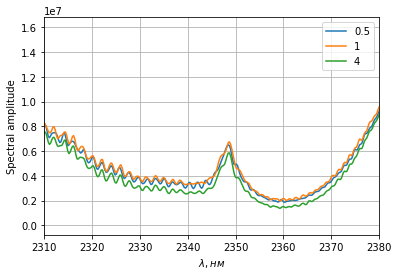

In [6]:
spectrum('air_05_no1', 'air_1_no1', 'air_4_no1')
xlim(left = 2310, right = 2380)
savefig('H_2O.pdf')

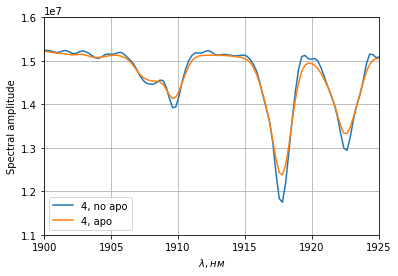

In [31]:
spectrum('air_4_no1', 'air_4_yes1')
xlim(left = 1900, right = 1925)
ylim(top = 1.6e7, bottom = 1.1e7)
legend(labels = ['4, no apo', '4, apo'])
savefig('diff_apod.pdf')

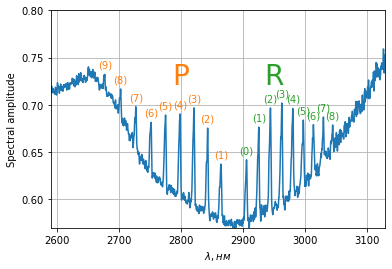

In [8]:
x, y = spectrum_plot('HCl_yes')
xlim(left = 2590, right = 3130)
ylim(top = 0.8, bottom = 0.57)

R_x = [i for i in x if 2900 < i < 3050]
R_y = [y[i] for i in range(len(y)) if 2900 < x[i] < 3050]
peaks_R = []

text_kwargs = dict(ha='center', va='center', fontsize=10, color='C2')

step = 23
i = 0
for dot in range(step, len(R_x)):
    if R_y[dot] == max(R_y[dot - step: dot + step]):
        #axvline(R_x[dot], linestyle = 'dashed')
        text(R_x[dot], R_y[dot] + 0.01, f'({i})', **text_kwargs)
        i += 1
        peaks_R.append(R_x[dot])

P_x = [i for i in x if 2650 < i < 2900]
P_y = [y[i] for i in range(len(y)) if 2650 < x[i] < 2900]
peaks_P = []


step = 26
i = 0
text_kwargs['color'] = 'C1'
for dot in range(step, len(P_x)):
    if P_y[dot] == max(P_y[dot - step: dot + step]) and P_x[dot] < 2875:
        #axvline(P_x[dot], linestyle = 'dashed')
        text(P_x[dot], P_y[dot] + 0.01, f'({9 - i})', **text_kwargs)
        i += 1
        peaks_P.append(P_x[dot])
        
peaks_P = peaks_P[::-1]
#plot(P_x, P_y)
text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
text(2800, 0.73, 'P', **text_kwargs)
text_kwargs['color'] = 'C2'
text(2950, 0.73, 'R', **text_kwargs)

xlabel(r'$\lambda, нм$')
ylabel('Spectral amplitude')
grid()
savefig('HCl.pdf')

[2864.51, 2843.29, 2821.34, 2798.68, 2775.53, 2752.14, 2727.54, 2702.94, 2677.38]
1 2 3 4 5 6 7 8 9
[2905.98, 2925.76, 2944.57, 2962.89, 2980.74, 2997.62, 3014.01, 3029.93, 3044.88]
0 1 2 3 4 5 6 7 8
[40.13535714  1.12696429]


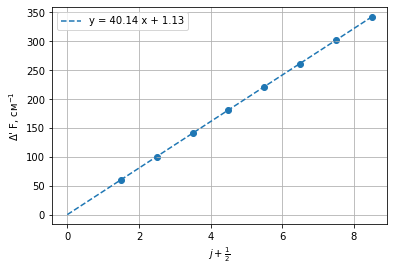

In [9]:
numbers = [i + 1.5 for i in range(len(peaks_R))]

print(peaks_P)
print(*range(1, 10))
print(peaks_R)
print(*range(9))

x = np.array(numbers[:-1])
y = np.array(peaks_R[1:]) - np.array(peaks_P[:-1])

grid()
coeff = np.polyfit(x, y, deg = 1)
pol = np.poly1d(coeff)

scatter(x, y)
x_plot = np.append([0], x)
plot(x_plot, pol(x_plot), linestyle = 'dashed', 
     label = f'y = {round(coeff[0], 2)} x + {round(coeff[1], 2)}')
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta$' F, см$^{-1}$")
legend()
savefig('one.pdf')
print(coeff)

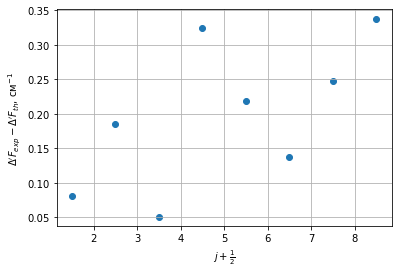

In [10]:
scatter(x, abs(y - pol(x)))
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta 'F_{exp} - \Delta 'F_{th}$, см$^{-1}$")
grid()
savefig('sin1.pdf')

[-0.0684003  40.77457182]


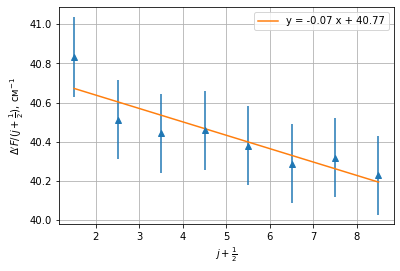

In [11]:
y_div = y / x
grid()
errorbar(x, y_div, linestyle = 'none',
        yerr = y_div * 0.005, marker = '^')

coeff = np.polyfit(x, y_div, deg = 1)
pol = np.poly1d(coeff)
plot(x, pol(x), 
    label = f'y = {round(coeff[0], 2)} x + {round(coeff[1], 2)}')
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta' F / (j + \frac{1}{2})$, см$^{-1}$")
legend()
savefig('one_s.pdf')
print(coeff)

[41.38190476  0.92297619]


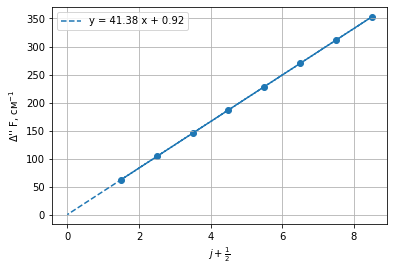

In [12]:
x = [i + 1.5 for i in range(8)]
y = np.array([peaks_R[i] - peaks_P[i + 1] for i in range(8)])

coeff = np.polyfit(x, y, deg = 1)
pol = np.poly1d(coeff)
x_plot = x + [0]
plot(x_plot, pol(x_plot), linestyle = 'dashed',
     label = f'y = {round(coeff[0], 2)} x + {round(coeff[1], 2)}')

grid()
scatter(x, y)
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta$'' F, см$^{-1}$")
legend()
savefig('two.pdf')

print(coeff)

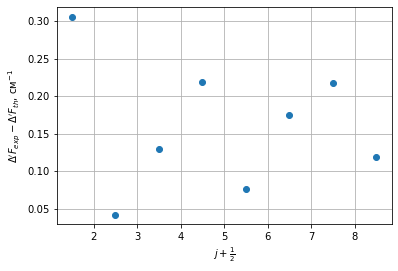

In [13]:
scatter(x, abs(y - pol(x)))
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta 'F_{exp} - \Delta 'F_{th}$, см$^{-1}$")
grid()
savefig('sin2.pdf')

[-0.04935979 41.86512671]


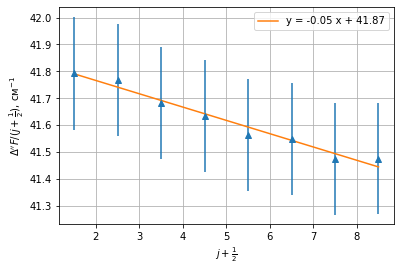

In [14]:
y_div = y / x
grid()
errorbar(x, y_div, linestyle = 'none',
        yerr = y_div * 0.005, marker = '^')

coeff = np.polyfit(x, y_div, deg = 1)
pol = np.poly1d(coeff)
plot(x, pol(x),
    label = f'y = {round(coeff[0], 2)} x + {round(coeff[1], 2)}')
xlabel(r'$j + \frac{1}{2}$')
ylabel(r"$\Delta'' F / (j + \frac{1}{2})$, см$^{-1}$")
legend()
savefig('two_s.pdf')
print(coeff)

# Вторая часть

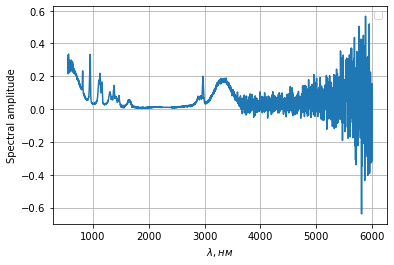

In [15]:
spectrum('изопропанол_нпво')
legend('')
savefig('изопропанол.pdf')

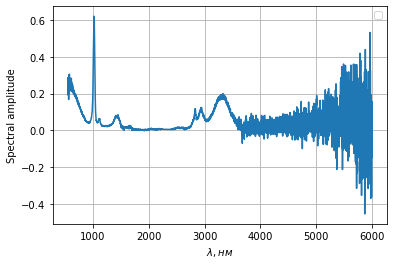

In [16]:
spectrum('метанол_нпво')
legend('')
savefig('метанол.pdf')

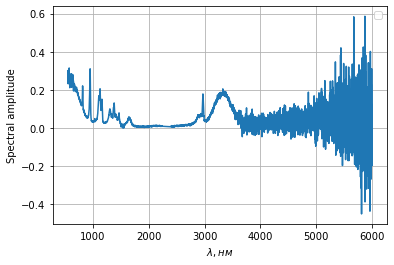

In [17]:
spectrum('этанол_нпво')
legend('')
savefig('этанол.pdf')

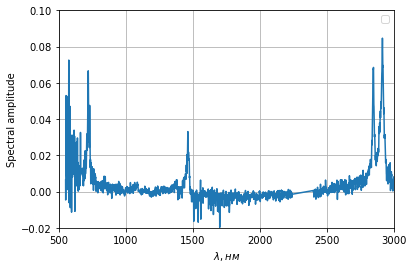

In [18]:
spectrum('пищевая_пленка')
legend('')
xlim(right = 3000, left = 500)
ylim(bottom = -0.02, top = 0.1)
savefig('плёнка.pdf')

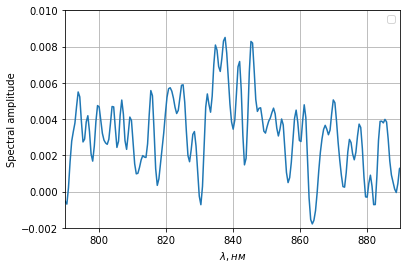

In [19]:
spectrum('пищевая_пленка')
legend('')
xlim(right = 890, left = 790)
ylim(bottom = -0.002, top = 0.01)
savefig('плёнка_зум.pdf')

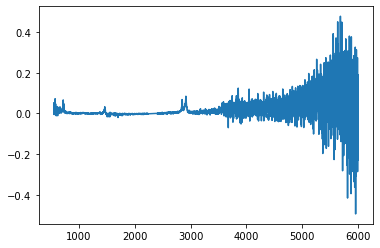

In [21]:
maxsmins = []
x, y = spectrum_plot('пищевая_пленка')
for i in range(len(x)):
    mid = 4
    if 0 < i - mid < i + mid < len(x):
        party1 = y[i-mid:i+mid].copy()
        party2 = y[i-mid:i+mid].copy()
        party1[mid] = min(party1)
        party2[mid] = max(party2)
        if y[i] > max(party1) or y[i] < min(party2):
            maxsmins.append(x[i])

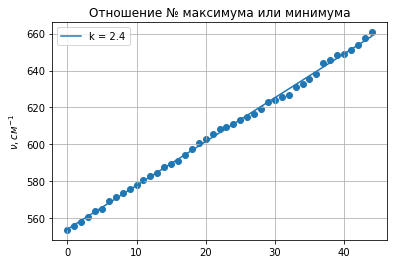

In [22]:
x = np.arange(len(maxsmins))[:45]
y = maxsmins[:45]
grid()
scatter(np.arange(len(y)), y)
coeff = np.polyfit(x, y, deg = 1)
poly = np.poly1d(coeff)
plot(x, poly(x), label = f'k = {round(coeff[0], 1)}')
title('Отношение № максимума или минимума')
ylabel(r'$\nu, см^{-1}$')
legend()
savefig('Х.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


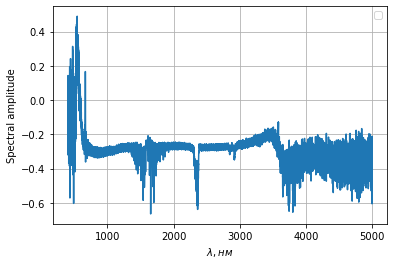

In [23]:
spectrum('NaCl')
savefig('NaCl.pdf')

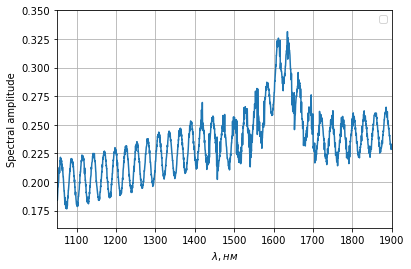

In [24]:
spectrum('NaCl_1')
legend('')
ylim(top = 0.35, bottom = 0.16)
xlim(left = 1050, right = 1900)
savefig('NaCl_зум.pdf')